# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [52]:
import pandas as pd
import numpy

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

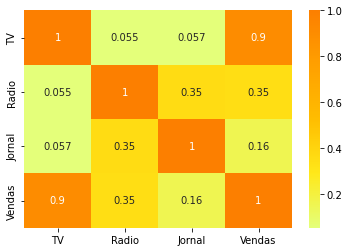

In [53]:
# display(tabela.corr()) -> função que percorre cada elemento e descobre a correlação entre eles

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(),cmap='Wistia',annot=True)
plt.show()

# Outra forma de ver a mesma análise
# sns.pairplot(tabela)
# plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [54]:
# y -> quem eu quero prever(Vendas)
# x -> todo resto no qual é utilizado para fazer a previsão

x = tabela.drop('Vendas',axis=1)
y = tabela['Vendas']

from sklearn.model_selection import train_test_split # Biblioteca scikit-learn

x_treino,x_teste,y_treino,y_teste = train_test_split(x, y, test_size=0.3,random_state=1) # Sempre utilizar essa ordem de variavel


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treina IA
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [56]:
from sklearn import metrics

# Cria as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9615852108656782


#### Visualização Gráfica das Previsões

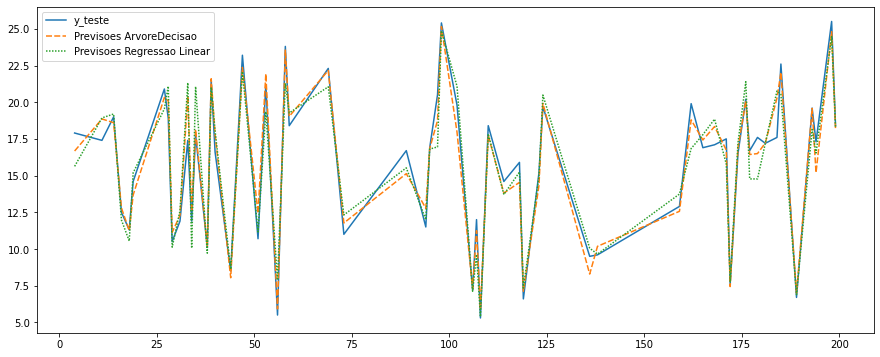

In [57]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [58]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)


tabela_nova = pd.DataFrame()
tabela_nova['TV'] = 23.1,44.5,170.2
tabela_nova['Radio'] = 3.8,0.0,45.9
tabela_nova['Jornal'] = 69.2, 5.1, 0.0

display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.654  8.313 20.213]
